In [33]:
import skimage
from skimage.util import invert
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [34]:
def plot_image(img):
    plt.figure(figsize=(8, 8))
    skimage.io.imshow(img)
    plt.show()

In [35]:
img = skimage.io.imread("snake_cropped_well.png")
inv_img = invert(img)
skeleton = skeletonize(inv_img / 255)

In [36]:
type(inv_img)

numpy.ndarray

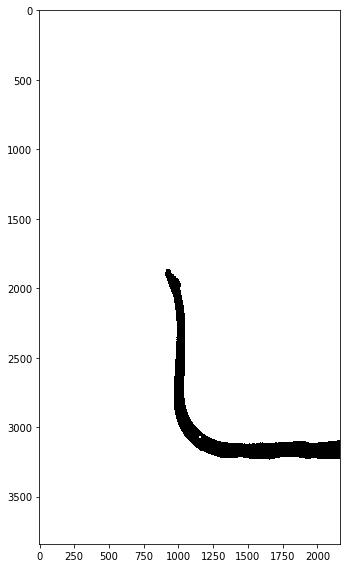

In [4]:
plot_image(img)

In [5]:
cropped = img[:, :1250]

In [7]:
inv_cropped = invert(cropped)

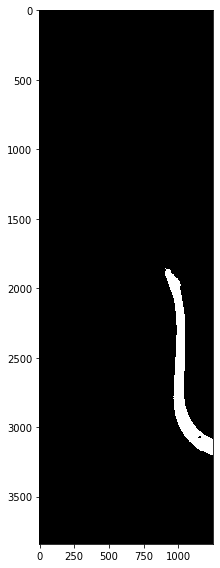

In [8]:
plot_image(inv_cropped)

In [9]:
rows = []
columns = []
for i in range(inv_cropped.shape[0]):
    if np.any(inv_cropped[i]):
        row_idx = i
        rows.append(row_idx)
        column_idx = np.where(inv_cropped[i])[0][0]
        columns.append(column_idx)

rows = np.array(rows)
columns = np.array(columns)

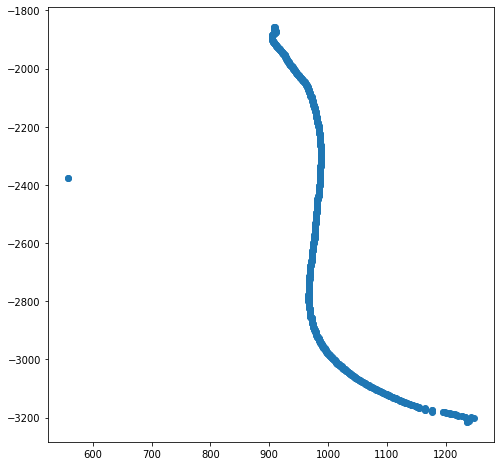

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(columns, -rows)

In [13]:
points = np.array(list(zip(columns, rows)))
np.min(points, axis=0)
np.argmin(points, axis=0)
pre_points = points[:519]
post_points = points[521:]
points = np.vstack((pre_points, post_points))

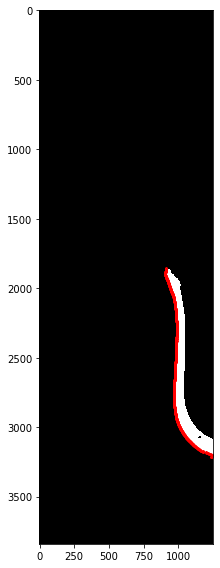

In [14]:
plt.figure(figsize=(8, 8))
skimage.io.imshow(inv_cropped)
plt.scatter(points[:, 0], points[:, 1], s=2, color="red")
plt.show()

In [15]:
# this computes the arc length in pixels
distance = np.cumsum(np.sqrt(np.sum(np.diff(points, axis=0) ** 2, axis=1)))
# put in zero at the first spot
distance = np.insert(distance, 0, 0)
# convert to cm
px_per_cm = 36.4  # pixels/cm
distance = distance / px_per_cm

In [16]:
interpolator = interp1d(distance, points, axis=0)

In [17]:
min_d = distance.min()
max_d = distance.max()

In [18]:
interp_points = np.linspace(min_d, max_d, 10)

In [19]:
interpolation = interpolator(interp_points)

In [20]:
interpolation

array([[ 909.        , 1856.        ],
       [ 944.        , 2009.33202028],
       [ 981.        , 2169.68595299],
       [ 987.        , 2342.88050613],
       [ 979.        , 2513.8417138 ],
       [ 970.        , 2684.13677201],
       [ 970.71956364, 2853.71956364],
       [1014.33379289, 3011.33379289],
       [1121.98580053, 3139.99290027],
       [1236.        , 3215.        ]])

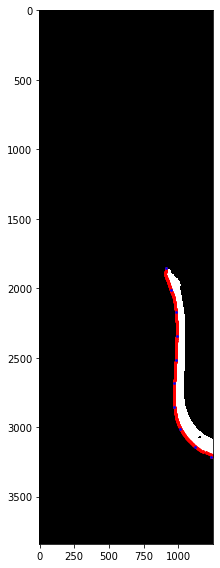

In [21]:
plt.figure(figsize=(8, 8))
skimage.io.imshow(inv_cropped)
plt.scatter(points[:, 0], points[:, 1], s=2, color="red")
plt.scatter(interpolation[:, 0], interpolation[:, 1], s=3, color="blue")
plt.show()

In [22]:
x = interpolation[:, 0]
y = interpolation[:, 1]
s = interp_points

In [23]:
spacing = np.diff(s)[0]

In [24]:
dx_dt = np.gradient(x, spacing)
dy_dt = np.gradient(y, spacing)
deriv_mag = np.sqrt(dx_dt**2 + dy_dt**2)
mag_one = np.all(deriv_mag == 1.0)
non_zero = np.all(deriv_mag > 0)
print(f"Magnitude 1 everywhere: {mag_one}")
print(f"Not zero everywhere: {non_zero}")

Magnitude 1 everywhere: False
Not zero everywhere: True


Don't have an arc length parametrization because the magnitude of the tangent vector is not one. Instead I have a proper parameterization because the derivatives $\frac{dx}{dt}$ and $\frac{dy}{dt}$ exist everywhere and are not zero simultatneously. Can then use 

\begin{equation}
\kappa = \frac{|x'y''-x''y'|}{(x'^2+y'^2)^{\frac{3}{2}}}
\end{equation}

In [25]:
d2x_dt2 = np.gradient(dx_dt, spacing)
d2y_dt2 = np.gradient(dy_dt, spacing)

In [26]:
kappa = np.abs(dx_dt * d2y_dt2 - d2x_dt2 * dy_dt) / (
    np.power(dx_dt**2 + dy_dt**2, 3 / 2)
)

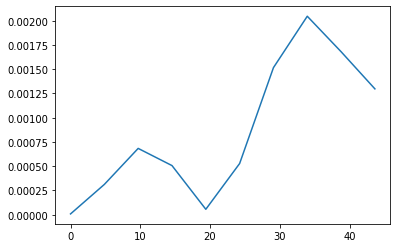

In [32]:
plt.plot(interp_points, kappa)
plt.show()

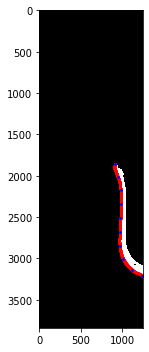

In [31]:
plt.figure(figsize=(5, 5))
skimage.io.imshow(inv_cropped)
plt.scatter(points[:, 0], points[:, 1], s=2, color="red")
plt.scatter(interpolation[:, 0], interpolation[:, 1], s=3, color="blue")
plt.show()